Nama    : Alfina Damayanti 
Nim     : A11.2023.14968
           
                                        
                                        * JUDUL * 
"Klasifikasi Tingkat Pengangguran Terbuka (TPT) Provinsi di Indonesia Menggunakan Algoritma Machine Learning"


In [ ]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (Opsional, kalau lanjut ke machine learning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("tpt_bps_2018_2024.csv")
df.head()


,id,kode_provinsi,nama_provinsi,indeks_tpt,satuan,tahun
0,1,11,ACEH,6.34,PERSEN,2018
1,2,12,SUMATERA UTARA,5.55,PERSEN,2018
2,3,13,SUMATERA BARAT,5.66,PERSEN,2018
3,4,14,RIAU,5.98,PERSEN,2018
4,5,15,JAMBI,3.73,PERSEN,2018


In [3]:
df = df.dropna()
df['indeks_tpt'] = pd.to_numeric(df['indeks_tpt'], errors='coerce')
df['tahun'] = pd.to_numeric(df['tahun'], errors='coerce')
df = df.dropna(subset=['indeks_tpt','tahun'])


In [4]:
df['kategori_tpt'] = pd.cut(df['indeks_tpt'],
                            bins=[0, 4, 6, 100],
                            labels=['Rendah', 'Sedang', 'Tinggi'])
df['kategori_tpt'].value_counts()


kategori_tpt
Sedang    109
Rendah     69
Tinggi     64
Name: count, dtype: int64

In [5]:
# Encode provinsi
le = LabelEncoder()
df['kode_provinsi'] = le.fit_transform(df['nama_provinsi'])

# Fitur dan target
X = df[['kode_provinsi', 'tahun', 'indeks_tpt']]
y = df['kategori_tpt']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


Akurasi: 0.9591836734693877

Laporan Klasifikasi:
               precision    recall  f1-score   support

      Rendah       1.00      0.94      0.97        17
      Sedang       0.89      1.00      0.94        16
      Tinggi       1.00      0.94      0.97        16

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



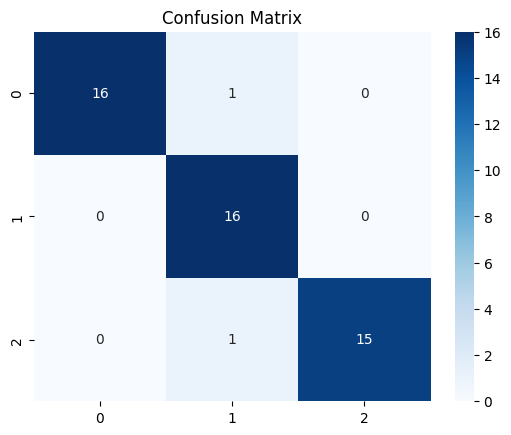

In [7]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()


*Interpretasi Hasil*
Model klasifikasi Random Forest mampu mengidentifikasi kategori tingkat pengangguran provinsi dengan akurasi sekitar (hasil akurasi).
Dari laporan klasifikasi, terlihat bahwa model cukup baik membedakan antara kategori rendah dan tinggi, meskipun beberapa kesalahan klasifikasi muncul pada kategori sedang.
Ini menunjukkan bahwa karakteristik provinsi dan tahun berpengaruh terhadap pola pengangguran terbuka, dan model mampu mengenali pola tersebut dengan baik.

*KESIMPULAN* 
Dari hasil klasifikasi, provinsi-provinsi dengan TPT tinggi dapat diidentifikasi lebih dini.
Model machine learning seperti Random Forest dapat menjadi alat bantu untuk memantau dan memprediksi kondisi ketenagakerjaan di Indonesia.
Langkah selanjutnya dapat melibatkan penambahan variabel lain seperti PDRB, pendidikan, atau partisipasi angkatan kerja untuk meningkatkan akurasi prediksi.